In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn

from IFdensity.influence_function import *

from IPython.display import Markdown as md

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

# contaminated data 
contam_data = np.array([[200.]])

# bandwidth parameter in the Gaussian kernel function
bw = 6.0

# penalty parameter 
log_pen_param = -12.0

# base density 
base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])

In [3]:
ifun = SMInfluenceFunction(
    data = data_waiting, 
    contam_data = contam_data, 
    contam_weight = 1e-8, 
    penalty_param = np.exp(log_pen_param), 
    base_density = base_density, 
    bw = bw)

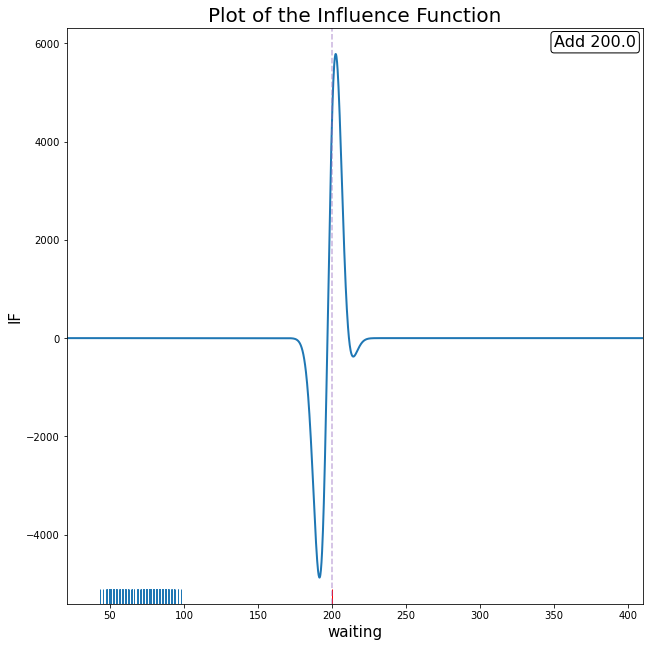

In [4]:
plot_kwargs = plot_IF_1d_params(x_limit=(21., 410.))
if_vals = ifun.plot_IF_logdensity_1d(
    plot_kwargs = plot_kwargs, 
    x_label = 'waiting')